<a href="https://colab.research.google.com/github/antog16/DataNMore/blob/main/Modulo2_Inidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Actividad Unidad 3

Grupo 8:

Antonio Giacometto
Antonio Fajardo
Wilmer Castaño

Dataset:hyroid-disease 
https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhypo.data

by the Garavan Institute and J. Ross  Quinlan, New South Wales Institute, Syndney, Australia.
 1987.


In [169]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhypo.data"
data = pd.read_csv(url, header=None, na_values="?")
#data = pd.read_csv(url, header=None, keep_default_na=True)

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
              'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 
              'hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U',
              'FTI_measured','FTI','TBG_measured','TBG','referral_source','Class']

#Se ajusta la clase eliminado descripcion
data['Class']= data['Class'].str.split('.', expand=True)[0]


#Se convierte tipos de dato object a Float
data['age'] =  pd.to_numeric(data.age, errors="coerce")
data['TSH'] = data['TSH'].astype(float)
data['T3'] = data['T3'].astype(float)
data['TT4'] = data['TT4'].astype(float)
data['T4U'] = data['T4U'].astype(float)
data['FTI'] = data['FTI'].astype(float)
data['TBG'] = data['TBG'].astype(float)

data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [170]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(2800, 30)

In [171]:
#Cual es el tipo de los atributos?
data.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
T

In [172]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


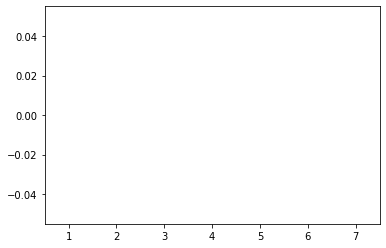

In [173]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['age'],data['TSH'],data['T3'],data['TT4'],data['T4U'],data['FTI'],data['TBG']))
plt.show()

In [174]:
#Medida de centralidad para atributos categóricos:
data.mode()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,59.0,F,f,f,f,f,f,f,f,f,...,t,101.0,t,0.99,t,100.0,f,NaN,other,negative
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN


In [175]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
data.corr()

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.059776,-0.244702,-0.052111,-0.163357,0.037623,NaN
TSH,-0.059776,1.000000,-0.160890,-0.254791,0.067705,-0.291188,NaN
T3,-0.244702,-0.160890,1.000000,0.563901,0.463434,0.351013,NaN
TT4,-0.052111,-0.254791,0.563901,1.000000,0.434248,0.795206,NaN
T4U,-0.163357,0.067705,0.463434,0.434248,1.000000,-0.173056,NaN
FTI,0.037623,-0.291188,0.351013,0.795206,-0.173056,1.000000,NaN
TBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Parece que T4 esa correlacionado con FTI

In [176]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

7

In [177]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
Class         

In [178]:
# Eliminamos columna TBG y 'TBG_Measured' ya que no presenta información en el df, debido a que tiene el mismo valor en todos los registros no entregará información valiosa para entrenar nuestro modelo de clasificación.

data.drop(columns = ['TBG_measured','TBG'], inplace = True)

data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative


In [179]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Class'].value_counts())

negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: Class, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [180]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
# PENDIENTE DE REALIZAR


data["age"].fillna(59, inplace = True)
data['sex'].fillna('F', inplace = True)


#se eliminan valores extremos

# 1) se elimina la edad de 455 años

data = data[data['age'] != 455]




In [181]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2799.000000,2515.000000,2214.000000,2615.000000,2502.000000,2504.000000
mean,51.702751,4.673571,2.024977,109.068987,0.997859,110.790695
std,18.988623,21.453600,0.824787,35.398781,0.194411,32.890274
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.000000,0.440000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.000000,2.600000,2.400000,125.000000,1.080000,124.000000
max,94.000000,478.000000,10.600000,430.000000,2.120000,395.000000


In [189]:
data = data[data['TSH'].notna()]
data = data[data['T4U'].notna()]
data = data[data['FTI'].notna()]
data = data[data['TT4'].notna()]


In [191]:
data.shape

(2383, 28)

In [192]:
print(data['Class'].value_counts())

negative                   2183
compensated hypothyroid     141
primary hypothyroid          58
secondary hypothyroid         1
Name: Class, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder 

['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
              'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 
              'hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U',
              'FTI_measured','FTI','TBG_measured','TBG','referral_source','Class']

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder() 
data['sex'] = labelencoder.fit_transform(data['sex'])
data['on_thyroxine'] = labelencoder.fit_transform(data['on_thyroxine'])
data['query_on_thyroxine'] = labelencoder.fit_transform(data['query_on_thyroxine'])
data['on_antithyroid_medication'] = labelencoder.fit_transform(data['on_antithyroid_medication'])
data['sick'] = labelencoder.fit_transform(data['sick'])
data['pregnant'] = labelencoder.fit_transform(data['pregnant'])
data['thyroid_surgery'] = labelencoder.fit_transform(data['thyroid_surgery'])
data['I131_treatment'] = labelencoder.fit_transform(data['I131_treatment'])
data['query_hypothyroid'] = labelencoder.fit_transform(data['query_hypothyroid'])
data['query_hyperthyroid'] = labelencoder.fit_transform(data['query_hyperthyroid'])
data['lithium'] = labelencoder.fit_transform(data['lithium'])
data['goitre'] = labelencoder.fit_transform(data['goitre'])
data['tumor'] = labelencoder.fit_transform(data['tumor'])
data['hypopituitary'] = labelencoder.fit_transform(data['hypopituitary'])
data['psych'] = labelencoder.fit_transform(data['psych'])
data['TSH_measured'] = labelencoder.fit_transform(data['TSH_measured'])
data['T3_measured'] = labelencoder.fit_transform(data['T3_measured'])
data['TT4_measured'] = labelencoder.fit_transform(data['TT4_measured'])
data['T4U_measured'] = labelencoder.fit_transform(data['T4U_measured'])
data['FTI_measured'] = labelencoder.fit_transform(data['FTI_measured'])
data['TBG_measured'] = labelencoder.fit_transform(data['TBG_measured'])
data['referral_source'] = labelencoder.fit_transform(data['referral_source'])
data['Class'] = labelencoder.fit_transform(data['Class'])
data.head()

In [ ]:
from sklearn import preprocessing

# Se normalizan todos los atributos seleccionados (columnas numericas)
data['age'] = preprocessing.scale(data['age'])
data['TSH'] = preprocessing.scale(data['TSH'])
data['T3'] = preprocessing.scale(data['T3'])
data['TT4'] = preprocessing.scale(data['TT4'])
data['T4U'] = preprocessing.scale(data['T4U'])
data['FTI'] = preprocessing.scale(data['FTI'])
data['TBG'] = preprocessing.scale(data['TBG'])

data.head()

In [ ]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria

NO SE HA REALIZADO AUN
POR DEFINIR LA TECNICA DE balanceo

g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

In [ ]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['C'].value_counts())

## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo C a partir de los valores de los demás atributos. Es decir, se va a predecir si una persona tiene ingresos superiores o inferiores a 50K dolares. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Class', axis=1), dataBal.Class, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)


In [ ]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

# Fin del programa